In [0]:
import numpy as np
import pandas as pd

In [0]:
df=pd.read_csv("UCI_Credit_Card.csv")

In [0]:
df=df.drop(["ID"],axis=1)

In [4]:
df.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [5]:
df["EDUCATION"].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [6]:
df["PAY_0"].value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64

In [7]:
df["BILL_AMT1"].value_counts()

0.0         2008
390.0        244
780.0         76
326.0         72
316.0         63
            ... 
52515.0        1
7691.0         1
10183.0        1
144525.0       1
79900.0        1
Name: BILL_AMT1, Length: 22723, dtype: int64

In [8]:
df["PAY_AMT1"].value_counts()

0.0        5249
2000.0     1363
3000.0      891
5000.0      698
1500.0      507
           ... 
354.0         1
639.0         1
397.0         1
1113.0        1
11783.0       1
Name: PAY_AMT1, Length: 7943, dtype: int64

In [9]:
df["SEX"].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [10]:
df["MARRIAGE"].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [0]:
df.query('MARRIAGE!=0',inplace = True)

In [0]:
df.query('EDUCATION!=0',inplace = True)

In [13]:
df["EDUCATION"].value_counts()

2    14024
1    10581
3     4873
5      280
4      123
6       51
Name: EDUCATION, dtype: int64

In [14]:
df["default.payment.next.month"].value_counts(normalize=True)

0    0.778465
1    0.221535
Name: default.payment.next.month, dtype: float64

In [15]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,29932.000000,29932.000000,29932.000000,29932.000000,29932.000000,29932.000000,29932.000000,29932.000000,29932.000000,29932.000000,29932.000000,29932.000000,29932.000000,2.993200e+04,29932.000000,29932.00000,29932.000000,29932.000000,2.993200e+04,29932.000000,29932.000000,29932.000000,29932.000000,29932.000000
mean,167523.375651,1.603568,1.852399,1.554590,35.479721,-0.016203,-0.133235,-0.165776,-0.220099,-0.265569,-0.290358,51297.386109,49242.862589,4.707703e+04,43320.699452,40367.54861,38927.267072,5659.603034,5.923502e+03,5226.158760,4830.180075,4805.269310,5221.906421,0.221535
std,129821.209970,0.489164,0.788941,0.518277,9.219044,1.123450,1.196990,1.196386,1.168849,1.133057,1.149735,73694.489286,71230.373793,6.940473e+04,64385.857098,60845.48775,59601.231051,16555.874642,2.306020e+04,17620.773728,15680.849676,15294.066811,17795.285035,0.415287
min,10000.000000,1.000000,1.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.00000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3577.000000,2989.750000,2.685500e+03,2339.750000,1772.75000,1261.000000,1000.000000,8.360000e+02,390.000000,298.000000,255.000000,122.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22420.500000,21234.500000,2.011150e+04,19068.500000,18125.50000,17111.500000,2100.000000,2.010000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67283.500000,64136.000000,6.025250e+04,54613.250000,50253.50000,49260.250000,5006.000000,5.000000e+03,4507.250000,4015.000000,4040.250000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.00000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


In [16]:
pd.crosstab(index=df["default.payment.next.month"],columns=[df["SEX"],df["EDUCATION"]])

SEX                            1                      ...     2                   
EDUCATION                      1     2     3   4   5  ...     2     3   4    5   6
default.payment.next.month                            ...                         
0                           3447  3965  1435  38  89  ...  6730  2205  78  173  22
1                            906  1408   543   4   6  ...  1921   690   3   12   4

[2 rows x 12 columns]

In [0]:
categorical=df[["SEX","EDUCATION","MARRIAGE"]]

In [0]:
from sklearn.preprocessing import OneHotEncoder

In [0]:
enc=OneHotEncoder()

In [20]:
cat=enc.fit_transform(categorical)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [0]:
one_hot=pd.DataFrame(cat.toarray())

In [0]:
one_hot.columns=["Male", "Female", "GraduateSchool", "University", "HighSchool", "Other","unknown","unknown","Married", "Single", "Other"]

In [0]:
df.reset_index(inplace=True)

In [0]:
new_df=pd.concat([df,one_hot],axis=1)

In [0]:
new_df=new_df.drop(["SEX","EDUCATION","MARRIAGE"],axis=1)

In [0]:
y=new_df["default.payment.next.month"]
x=new_df.drop(["default.payment.next.month"],axis=1)

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

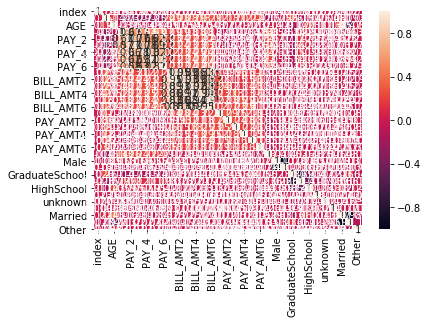

In [28]:
sns.heatmap(new_df.corr(),annot=True)

In [0]:
from sklearn.model_selection import train_test_split as tts

In [0]:
x_train, x_test, y_train, y_test = tts(x, y, test_size=0.3, random_state=42)

In [31]:
import keras
from keras.models import Sequential
from keras.layers import Dense
import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [32]:
classifier = Sequential()

classifier.add(Dense(output_dim = 15,init= 'uniform',activation = 'relu', input_dim = 29))

classifier.add(Dense(output_dim = 15,init= 'uniform', activation = 'relu'))

classifier.add(Dense(output_dim = 1,init= 'uniform', activation = 'sigmoid'))

In [0]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

classifier.fit(x_train, y_train, batch_size = 10, epochs = 50)

In [0]:
y_pred = classifier.predict(X1_test)

In [0]:
for i in range(len(y_pred)):
    if y_pred[i] < 0.5:
        y_pred_new.append(0)
    else:
        y_pred_new.append(1)